**Car_Price_Prediction
 **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")

In [ ]:
data.shape

(205, 26)

In [ ]:
data.info

<bound method DataFrame.info of      car_ID  symboling                   CarName  ... citympg highwaympg    price
0         1          3        alfa-romero giulia  ...      21         27  13495.0
1         2          3       alfa-romero stelvio  ...      21         27  16500.0
2         3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3         4          2               audi 100 ls  ...      24         30  13950.0
4         5          2                audi 100ls  ...      18         22  17450.0
..      ...        ...                       ...  ...     ...        ...      ...
200     201         -1           volvo 145e (sw)  ...      23         28  16845.0
201     202         -1               volvo 144ea  ...      19         25  19045.0
202     203         -1               volvo 244dl  ...      18         23  21485.0
203     204         -1                 volvo 246  ...      26         27  22470.0
204     205         -1               volvo 264gl  ...      19     

In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
# Check Missing Values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype']=labelencoder.fit_transform(data['fueltype'])
data['aspiration']=labelencoder.fit_transform(data['aspiration'])
data['carbody']=labelencoder.fit_transform(data['carbody'])
data['drivewheel']=labelencoder.fit_transform(data['drivewheel'])
data['enginelocation']=labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem']=labelencoder.fit_transform(data['fuelsystem'])
data['doornumber']=labelencoder.fit_transform(data['doornumber'])


In [ ]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,ohc,five,136,5,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,ohc,five,136,5,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,1,0,0,4,1,0,105.8,192.7,71.4,55.7,2954,ohc,five,136,5,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,1,1,0,3,1,0,105.8,192.7,71.4,55.9,3086,ohc,five,131,5,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),1,1,1,2,0,0,99.5,178.2,67.9,52.0,3053,ohc,five,131,5,3.13,3.40,7.0,160,5500,16,22,17859.167


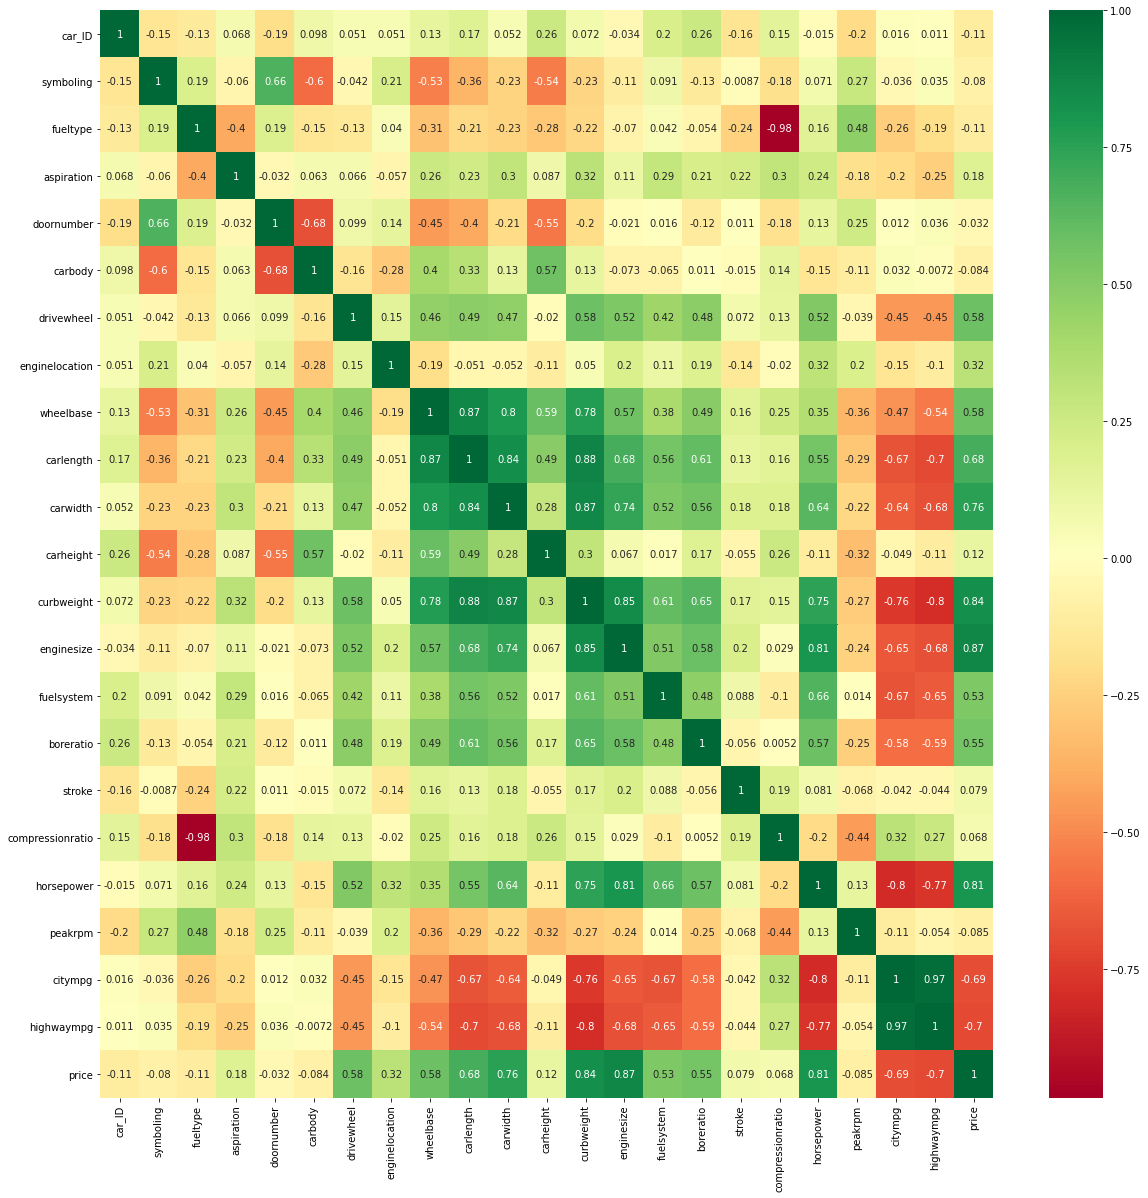

In [ ]:
correlation=data.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
a=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
data1=data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
            'wheelbase','drivewheel','price','enginelocation']]
data1.head(4)

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   horsepower      205 non-null    int64  
 1   boreratio       205 non-null    float64
 2   enginesize      205 non-null    int64  
 3   curbweight      205 non-null    int64  
 4   carwidth        205 non-null    float64
 5   carlength       205 non-null    float64
 6   wheelbase       205 non-null    float64
 7   drivewheel      205 non-null    int64  
 8   price           205 non-null    float64
 9   enginelocation  205 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 16.1 KB


In [ ]:
data1.describe()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,104.117073,3.329756,126.907317,2555.565854,65.907805,174.049268,98.756585,1.326829,13276.710571,0.014634
std,39.544167,0.270844,41.642693,520.680204,2.145204,12.337289,6.021776,0.556171,7988.852332,0.120377
min,48.000000,2.540000,61.000000,1488.000000,60.300000,141.100000,86.600000,0.000000,5118.000000,0.000000
25%,70.000000,3.150000,97.000000,2145.000000,64.100000,166.300000,94.500000,1.000000,7788.000000,0.000000
50%,95.000000,3.310000,120.000000,2414.000000,65.500000,173.200000,97.000000,1.000000,10295.000000,0.000000
75%,116.000000,3.580000,141.000000,2935.000000,66.900000,183.100000,102.400000,2.000000,16503.000000,0.000000
max,288.000000,3.940000,326.000000,4066.000000,72.300000,208.100000,120.900000,2.000000,45400.000000,1.000000


In [ ]:
# Split Data
X=(data1[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
            'wheelbase','drivewheel','enginelocation']])
Y=(data1[['price']])
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=54)

In [ ]:
# Normalizing train and test data data
mean = X_train.mean(axis=0)
X_train-= mean
std = X_train.std(axis=0)
X_train /= std

mean = Y_train.mean(axis=0)
Y_train-= mean
std = Y_train.std(axis=0)
Y_train /= std

mean = X_test.mean(axis=0)
X_test-= mean
std = X_test.std(axis=0)
X_test /= std

mean = Y_test.mean(axis=0)
Y_test-= mean
std = Y_test.std(axis=0)
Y_test/= std

In [ ]:
X_train.describe()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,-1.558582e-16,6.462197e-15,-1.341196e-16,-1.195625e-16,1.293604e-14,3.835316e-15,-3.437809e-15,-7.763797e-17,-6.230447e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.416228e+00,-1.615909e+00,-1.616817e+00,-1.976762e+00,-2.592539e+00,-2.620395e+00,-1.956899e+00,-2.391398e+00,-1.186811e-01
25%,-8.545928e-01,-6.948330e-01,-7.198050e-01,-7.891847e-01,-8.864290e-01,-6.110203e-01,-6.856462e-01,-5.626819e-01,-1.186811e-01
50%,-2.418996e-01,-8.078205e-02,-1.716311e-01,-2.392077e-01,-1.947629e-01,-6.083438e-02,-3.638100e-01,-5.626819e-01,-1.186811e-01
75%,3.197359e-01,9.554289e-01,3.765429e-01,7.283789e-01,4.507922e-01,6.727469e-01,5.856069e-01,1.266034e+00,-1.186811e-01
max,4.710704e+00,2.337044e+00,4.537681e+00,2.829477e+00,2.940790e+00,2.721990e+00,3.562592e+00,1.266034e+00,8.367018e+00


In [ ]:
Y_train.describe()

,price
count,1.430000e+02
mean,1.715799e-16
std,1.000000e+00
min,-9.946593e-01
25%,-6.761374e-01
50%,-3.673111e-01
75%,3.848355e-01
max,3.500570e+00


Build_Model

In [ ]:
def build_model():
      model = Sequential()
      model.add(tf.keras.layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
      model.add(tf.keras.layers.Dense(32, activation='relu'))
      model.add(tf.keras.layers.Dense(1))
      model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
      return model

In [ ]:
build_model

<function __main__.build_model>

In [ ]:
# Validation
k=5
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    X_val =X_train[i * num_val_samples: (i + 1) * num_val_samples]
    Y_val = Y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_X_train = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_Y_train = np.concatenate(
        [Y_train[:i * num_val_samples],
         Y_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    
model = build_model()
history = model.fit(partial_X_train, partial_Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

 Building the history of successive mean K-fold validation scores

In [ ]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
average_mae_history

[0.4338148534297943,
 0.3966333270072937,
 0.3779003322124481,
 0.3642999231815338,
 0.3688676953315735,
 0.32996630668640137,
 0.3297871947288513,
 0.3735646605491638,
 0.3603348135948181,
 0.3081418573856354,
 0.3593449592590332,
 0.32001224160194397,
 0.33432918787002563,
 0.334467351436615,
 0.4142496883869171,
 0.3493334650993347,
 0.3450797498226166,
 0.3364250361919403,
 0.32885175943374634,
 0.42282524704933167,
 0.3378029763698578,
 0.36818069219589233,
 0.4021579325199127,
 0.3501533567905426,
 0.42668217420578003,
 0.3943900167942047,
 0.3902077078819275,
 0.3786512017250061,
 0.34685611724853516,
 0.35631290078163147,
 0.37865883111953735,
 0.4808819591999054,
 0.36416786909103394,
 0.4218811094760895,
 0.40879374742507935,
 0.38637784123420715,
 0.40540605783462524,
 0.3822762072086334,
 0.3713981509208679,
 0.3659196197986603,
 0.3614216446876526,
 0.3958859443664551,
 0.35989466309547424,
 0.35382550954818726,
 0.3747299611568451,
 0.3965475261211395,
 0.3730347454547882

 Plotting validation scores

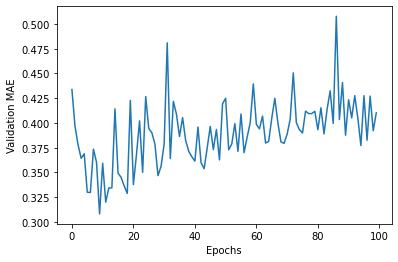

In [ ]:
import matplotlib.pyplot as plt
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

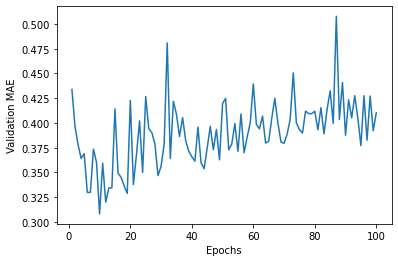

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

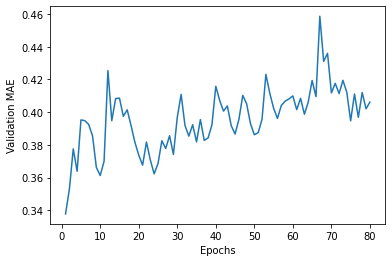

In [ ]:
def smooth_curve(points, factor=0.5):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[20:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Training the final model

In [ ]:
model = build_model()
model.fit(X_train, Y_train,
          epochs=100, batch_size=16, verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 1.2563 - mae: 0.7993
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6344 - mae: 0.5019
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.3862 - mae: 0.4422
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.2830 - mae: 0.3719
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2305 - mae: 0.3513
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1482 - mae: 0.2929
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1476 - mae: 0.2858
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1483 - mae: 0.2672
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1383 - mae: 0.2718
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0848 - mae: 0.2054
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0904 

In [ ]:
test_mse_score, test_mae_score = model.evaluate(X_test, Y_test)
print("test_mse_score:",test_mse_score,end='\n\n')
print("test_mae_score:",test_mae_score)

2/2 [==============================] - 0s 7ms/step - loss: 0.1110 - mae: 0.2352
test_mse_score: 0.11100310832262039

test_mae_score: 0.23522906005382538


In [ ]:
#Prediction
Prediction=model.predict(X_test)
P=Prediction.round(decimals=3)
P

array([[ 0.573],
       [-0.766],
       [-0.582],
       [ 1.01 ],
       [-0.247],
       [ 2.749],
       [-0.237],
       [-0.664],
       [-0.661],
       [-0.715],
       [-0.925],
       [-0.612],
       [-0.025],
       [ 0.12 ],
       [-0.805],
       [ 0.219],
       [ 3.352],
       [-0.532],
       [-0.603],
       [ 0.878],
       [-0.102],
       [ 0.656],
       [-0.271],
       [-0.493],
       [-0.493],
       [ 0.553],
       [-0.415],
       [ 0.312],
       [ 0.31 ],
       [-0.762],
       [-0.237],
       [-0.612],
       [-0.322],
       [-0.49 ],
       [ 0.73 ],
       [ 0.049],
       [ 2.429],
       [-0.919],
       [-0.791],
       [-0.792],
       [-0.598],
       [-0.131],
       [-0.324],
       [ 0.312],
       [ 0.804],
       [-0.858],
       [-0.799],
       [ 0.125],
       [ 2.392],
       [-0.789],
       [-0.871],
       [-0.656],
       [ 0.148],
       [ 0.208],
       [-1.048],
       [ 0.749],
       [ 0.819],
       [-0.672],
       [-0.589

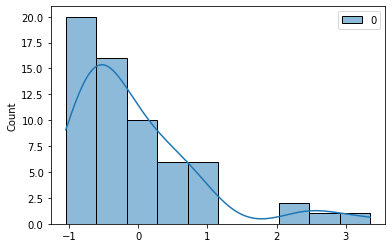

In [ ]:
sns.histplot(Prediction,kde=True)